In [116]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 
import sys 
import os 
# add some functions 
sys.path.append(os.path.abspath("./scripts"))
from tools import *

In [117]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
sns.set_style("whitegrid")
outdir = './main_text_figures/'
!mkdir $outdir

# define system directories 
WT_apo_dir = "./wt_hiapp_apo/outdir_wt_hiapp_apo/"
S20G_apo_dir = "./s20g_hiapp_apo/outdir_s20g_hiapp_apo/"

WT_A_outdir = "./wt_hiapp_yxa1/outdir_wt_hiapp_yxa1/"
WT_I_outdir = "./wt_hiapp_yxi1/outdir_wt_hiapp_yxi1/"
S20G_A_outdir = "./s20g_hiapp_yxa1/outdir_s20g_hiapp_yxa1/"
S20G_I_outdir = "./s20g_hiapp_yxi1/outdir_s20g_hiapp_yxi1/"

# define the sequences to plot 
sequence_ol_both = ['K', 'C', 'N', 'T', 'A', 'T', 'C', 'A', 'T', 'Q', 'R', 'L', 'A', 'N', 'F', 'L', 'V', 'H', 'S', 'X', 'N', 'N', 'F', 'G', 'A', 'I', 'L', 'S', 'S', 'T', 'N', 'V', 'G', 'S', 'N', 'T', 'Y', '      NH$_2$']
sequence_ol_wt = ['K', 'C', 'N', 'T', 'A', 'T', 'C', 'A', 'T', 'Q', 'R', 'L', 'A', 'N', 'F', 'L', 'V', 'H', 'S', 'S', 'N', 'N', 'F', 'G', 'A', 'I', 'L', 'S', 'S', 'T', 'N', 'V', 'G', 'S', 'N', 'T', 'Y', '      NH$_2$']
sequence_ol_s20g= ['K', 'C', 'N', 'T', 'A', 'T', 'C', 'A', 'T', 'Q', 'R', 'L', 'A', 'N', 'F', 'L', 'V', 'H', 'S', 'G', 'N', 'N', 'F', 'G', 'A', 'I', 'L', 'S', 'S', 'T', 'N', 'V', 'G', 'S', 'N', 'T', 'Y', '      NH$_2$']

mkdir: ./main_text_figures/: File exists


In [118]:
sys_colors = {
    "WT Apo": "tab:red",
    "WT + YX-A-1":"tab:green",
    "WT + YX-I-1":"tab:orange", 
    "S20G + YX-A-1" : "tab:green",
    "S20G + YX-I-1" : "tab:orange",
    "S20G Apo" : "tab:blue",    
}


from matplotlib.colors import ListedColormap
# Create a list of distinct gray values
num_grays = 8
grays = np.linspace(0.0, 0.8, num_grays)
# Create a ListedColormap with distinct gray values
custom_pastel_gray_cmap = ListedColormap([(gray, gray, gray) for gray in grays])

viridis_hex = ['#440154', '#414487', '#2a788e', '#22a884', '#7ad151', '#fde725']

# Figure 1

<Figure size 640x480 with 0 Axes>

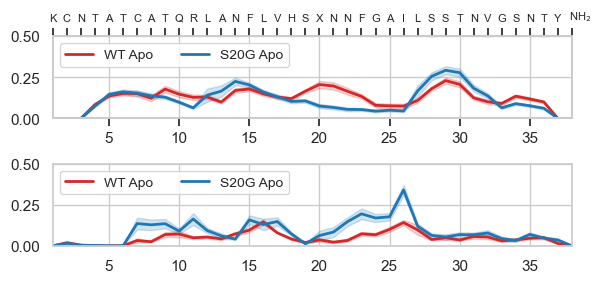

In [119]:

files = ['Hprop.err.dat','Eprop.err.dat']
all_dirs = [ WT_apo_dir, S20G_apo_dir]

labels = [
    "WT Apo",
    "S20G Apo",
]

fig, axes = plt.subplots(2, 1, figsize=(6,3.0))

for n, file in enumerate(files):
    count = 0 
    for directory in all_dirs: 
        attr = np.loadtxt(directory+file) # attr = attribute 
        upper = attr[:,1] + attr[:,2]
        lower = attr[:,1] - attr[:,2]

        label = labels[count]
        linest = "-"

        sns.lineplot(x=attr[:, 0], y=attr[:, 1],
                    color=sys_colors[label], linewidth=2, linestyle=linest, label=label , ax=axes[n])
        axes[n].fill_between(attr[:, 0], upper, lower, color=sys_colors[label], alpha=0.2)
        #plt.errorbar(attr[:, 0], attr[:, 1], attr[:,2], color=sys_colors[label], alpha=0.5, linestyle="none")
        
        axes[n].set_xlim(1, 38)
        axes[n].set_ylim(0.0, 0.5)
        
        count += 1

# axes[1].set_xlabel('Residue', fontsize=12)
# axes[0].set_ylabel('Helix Fraction', fontsize=12)
# axes[1].set_ylabel('Sheet Fraction', fontsize=12)

axes[0].legend(loc='upper left', fontsize=10, ncol = 2)
axes[1].legend(loc='upper left', fontsize=10, ncol = 2)

ax2 = axes[0].twiny()
top_ticks = np.arange(0, 38, 1)
plt.grid(True)
plt.tight_layout()
ax2.set_xticks(top_ticks)
ax2.set_xticklabels([f'{i}' for i in sequence_ol_both[0::1]], fontsize=8)
ax2.grid(False)
plt.savefig(outdir+'Hprop.Eprop.wt.s20g.apo.pdf', dpi=300, bbox_inches='tight')

plt.show()

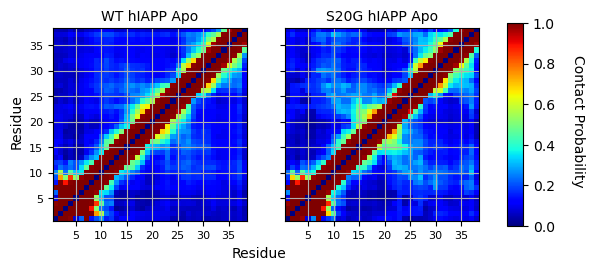

In [120]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
sns.reset_defaults()
file = "contactmap.dat"
fig, axs = plt.subplots(1,2, figsize=(5.5, 7.0),sharey=True,sharex=True)

all_dirs = [WT_apo_dir, S20G_apo_dir]

labels = [
    "WT hIAPP Apo",
    "S20G hIAPP Apo",
]
# known from computed plots, next time load in

count = 0 
for directory in all_dirs: 
    attr = np.loadtxt(directory+file) # attr = attribute 
    label = labels[count]
    im = axs[count].imshow(attr, vmax=1.0, vmin=0.0, cmap = "jet")
    axs[count].set_title(label,size=10,pad=5)
    
    #imaxes = plt.gca()
    count += 1

cax = fig.add_axes([0.95, 0.35, .03, 0.29])
fig.colorbar(im, cax=cax, orientation='vertical')
cax.tick_params(axis="x", labelsize=8)

# Set y-axis tick size
for n, ax in enumerate(axs):
    ax.set_xticks(np.arange(0, 38, 5)-1, np.arange(0,38,5) )
    ax.set_yticks(np.arange(0, 38, 5)-1, np.arange(0,38,5) )
    ax.set_xlim(-0.5,37.5)
    ax.set_ylim(-0.5,37.5)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.grid(True)

fig.text(0.5, 0.31, 'Residue', ha='center', va='center', fontsize=10)
fig.text(1.08, 0.5, 'Contact Probability', ha='center', va='center', fontsize=10, rotation =270)
fig.text(0.06, 0.5, 'Residue', rotation=90, ha='center', va='center', fontsize=10)
plt.savefig('%s/contact.map.compare.s20g.wt.apo.pdf' % outdir, dpi=400,bbox_inches='tight')
plt.show()

# Figure 2 

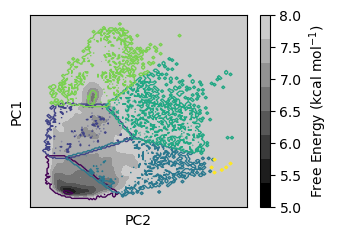

In [121]:
PCs = np.load(WT_apo_dir+"/concat_all_incpca.npy")

# get dictionary 
with open(WT_apo_dir+"/_concat_all_6c_kmeans_cluster_indices.pkl", "rb") as f: 
    c_dict = pickle.load(f)

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(3.5,2.5))


counts,xbins,ybins=np.histogram2d(PCs[:,1],PCs[:,0],bins=50,density=True, range=[[np.min(PCs[:,1])-50, np.max(PCs[:,1])+50], [np.min(PCs[:,0])-50, np.max(PCs[:,0])+50]]) # LogNorm()
a = np.log(np.flipud(counts)+.000001)
T = 300
a = -(0.001987*T)*a

im = ax.imshow(a, interpolation='gaussian', extent=[ybins[0], ybins[-1], 
                                                    xbins[0], xbins[-1]], cmap=custom_pastel_gray_cmap, aspect='auto')
im.set_clim(5.0, 8.0)  # Adjust these values based on your data

# Add a colorbar to the plot
cbar = plt.colorbar(im, ax=ax, label='Free Energy (kcal mol$^{-1}$)')

# plot the outlines with a thicker line 

for i in range(len(c_dict.keys())):
        frame_ind = c_dict[i]
        x = PCs[frame_ind][:,0]
        y = PCs[frame_ind][:,1]
        
        # calculate the 2D density of the data given
        counts,xbins,ybins=np.histogram2d(x,y,bins=150,density=True, range=[[np.min(PCs[:,0])-50, np.max(PCs[:,0])+50], [np.min(PCs[:,1])-50, np.max(PCs[:,1])+50]]) # LogNorm()
        # make the contour plot
        ax.contour(counts.transpose(),extent=[xbins.min(),xbins.max(), ybins.min(),ybins.max()],linewidths=1.0,colors=viridis_hex[i],
            linestyles='solid', levels=1)

plt.ylim(ybins.min(), ybins.max())
plt.xlim(xbins.min(), xbins.max())
plt.ylabel("PC1")
plt.xlabel("PC2")
plt.xticks([])
plt.yticks([])
plt.grid(False)

plt.savefig(outdir + "iapp_wt_apo_FES_on_PCs.pdf", dpi=400, bbox_inches="tight")

plt.show()

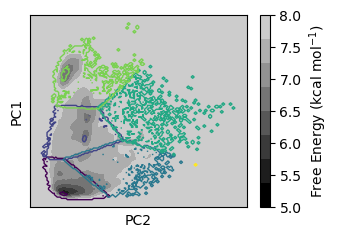

In [122]:
PCs = np.load(S20G_apo_dir+"/concat_all_incpca.npy")

# get dictionary 
with open(S20G_apo_dir+"/_concat_all_6c_kmeans_cluster_indices.pkl", "rb") as f: 
    c_dict = pickle.load(f)

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(3.5,2.5))


counts,xbins,ybins=np.histogram2d(PCs[:,1],PCs[:,0],bins=50,density=True, range=[[np.min(PCs[:,1])-50, np.max(PCs[:,1])+50], [np.min(PCs[:,0])-50, np.max(PCs[:,0])+50]]) # LogNorm()
a = np.log(np.flipud(counts)+.000001)
T = 300
a = -(0.001987*T)*a

im = ax.imshow(a, interpolation='gaussian', extent=[ybins[0], ybins[-1], 
                                                    xbins[0], xbins[-1]], cmap=custom_pastel_gray_cmap, aspect='auto')
im.set_clim(5.0, 8.0)  # Adjust these values based on your data

# Add a colorbar to the plot
cbar = plt.colorbar(im, ax=ax, label='Free Energy (kcal mol$^{-1}$)')

# plot the outlines with a thicker line 

for i in range(len(c_dict.keys())):
        frame_ind = c_dict[i]
        x = PCs[frame_ind][:,0]
        y = PCs[frame_ind][:,1]
        
        # calculate the 2D density of the data given
        counts,xbins,ybins=np.histogram2d(x,y,bins=150,density=True, range=[[np.min(PCs[:,0])-50, np.max(PCs[:,0])+50], [np.min(PCs[:,1])-50, np.max(PCs[:,1])+50]]) # LogNorm()
        # make the contour plot
        ax.contour(counts.transpose(),extent=[xbins.min(),xbins.max(), ybins.min(),ybins.max()],linewidths=1.0,colors=viridis_hex[i],
            linestyles='solid', levels=1)

plt.ylim(ybins.min(), ybins.max())
plt.xlim(xbins.min(), xbins.max())
plt.ylabel("PC1")
plt.xlabel("PC2")
plt.xticks([])
plt.yticks([])
plt.grid(False)

plt.savefig(outdir + "iapp_s20g_apo_FES_on_PCs.pdf", dpi=400, bbox_inches="tight")

plt.show()

# Figure 3 

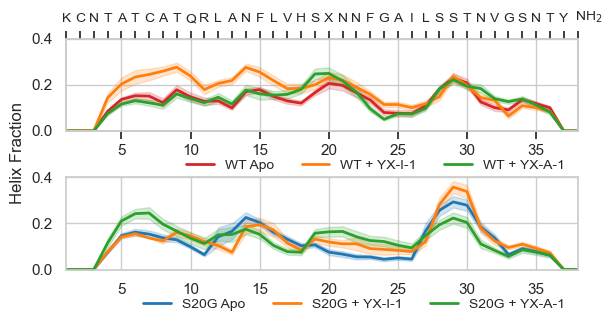

In [123]:
# Helical Fraction of each system 
# both WT and S20G serries 
sns.set(style='whitegrid')

file = 'Hprop.err.dat'
boundfile = 'Hprop.bound.err.dat'

all_dirs = [WT_apo_dir, WT_I_outdir, WT_A_outdir]

labels = [
    "WT Apo",
    "WT + YX-I-1", 
    "WT + YX-A-1"
    
]

new_labels = [
    "WT Apo",
    "WT + YX-I-1",
    "WT + YX-A-1"
    
]

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(6.6,3.0))
for k, ax in enumerate(axs.flatten()): 
    if k > 0: 
        all_dirs = [S20G_apo_dir, S20G_I_outdir, S20G_A_outdir]
        labels=["S20G Apo", "S20G + YX-I-1", "S20G + YX-A-1"]
        new_labels = ["S20G Apo", "S20G + YX-I-1", "S20G + YX-A-1"]
    count = 0 
    for directory in all_dirs: 
        attr = np.loadtxt(directory+file) # attr = attribute 
        upper = attr[:,1] + attr[:,2]
        lower = attr[:,1] - attr[:,2]
        label = labels[count]
        sns.lineplot(x=attr[:, 0], y=attr[:, 1], color=sys_colors[label], label=new_labels[count], linewidth=2, ax=ax)
        ax.fill_between(attr[:, 0], upper, lower, color=sys_colors[label], alpha=0.2)
        count += 1



    ax.set_ylim(0.0, 0.4)
    ax.set_xlim(1, 38)
    # ax.set_xticks(fontsize=12)
    # ax.set_yticks(fontsize=12)
    #plt.xlabel('Residue', fontsize=22, labelpad=30)
    if k < 1: 
        axs[0].grid(True)
        ax2 = axs[0].twiny()
        top_ticks = np.arange(0, 38, 1)

        ax2.set_xticks(top_ticks)
        ax2.set_xticklabels([f'{i}' for i in sequence_ol_both[::1]], fontsize=10)
        ax2.grid(False)
fig.text(0.04, 0.5, 'Helix Fraction', va='center', rotation='vertical')       
axs[0].legend(loc='upper right', fontsize=10, bbox_to_anchor=(1.0, -0.17), ncol=3, frameon=False)
axs[1].legend(loc='upper right', fontsize=10, bbox_to_anchor=(1.0, -0.17), ncol=3, frameon=False)
plt.subplots_adjust(wspace=0.1, hspace=0.5)

plt.savefig(outdir+'Hprop.wt.s20g.apo.yxi1.yxa1.fig3.pdf', dpi=400, bbox_inches='tight')

plt.show()

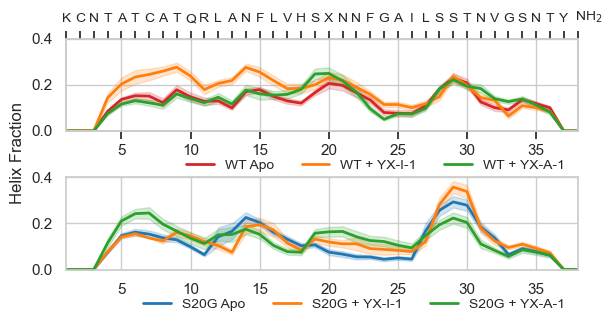

In [124]:
# Helical Fraction of each system 
# both WT and S20G serries 
sns.set(style='whitegrid')

file = 'Hprop.err.dat'
boundfile = 'Hprop.bound.err.dat'

all_dirs = [WT_apo_dir, WT_I_outdir, WT_A_outdir]

labels = [
    "WT Apo",
    "WT + YX-I-1", 
    "WT + YX-A-1"
    
]

new_labels = [
    "WT Apo",
    "WT + YX-I-1",
    "WT + YX-A-1"
    
]

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(6.6,3.0))
for k, ax in enumerate(axs.flatten()): 
    if k > 0: 
        all_dirs = [S20G_apo_dir, S20G_I_outdir, S20G_A_outdir]
        labels=["S20G Apo", "S20G + YX-I-1", "S20G + YX-A-1"]
        new_labels = ["S20G Apo", "S20G + YX-I-1", "S20G + YX-A-1"]
    count = 0 
    for directory in all_dirs: 
        attr = np.loadtxt(directory+file) # attr = attribute 
        upper = attr[:,1] + attr[:,2]
        lower = attr[:,1] - attr[:,2]
        label = labels[count]
        sns.lineplot(x=attr[:, 0], y=attr[:, 1], color=sys_colors[label], label=new_labels[count], linewidth=2, ax=ax)
        ax.fill_between(attr[:, 0], upper, lower, color=sys_colors[label], alpha=0.2)
        count += 1



    ax.set_ylim(0.0, 0.4)
    ax.set_xlim(1, 38)
    # ax.set_xticks(fontsize=12)
    # ax.set_yticks(fontsize=12)
    #plt.xlabel('Residue', fontsize=22, labelpad=30)
    if k < 1: 
        axs[0].grid(True)
        ax2 = axs[0].twiny()
        top_ticks = np.arange(0, 38, 1)

        ax2.set_xticks(top_ticks)
        ax2.set_xticklabels([f'{i}' for i in sequence_ol_both[::1]], fontsize=10)
        ax2.grid(False)
fig.text(0.04, 0.5, 'Helix Fraction', va='center', rotation='vertical')       
axs[0].legend(loc='upper right', fontsize=10, bbox_to_anchor=(1.0, -0.17), ncol=3, frameon=False)
axs[1].legend(loc='upper right', fontsize=10, bbox_to_anchor=(1.0, -0.17), ncol=3, frameon=False)
plt.subplots_adjust(wspace=0.1, hspace=0.5)

plt.savefig(outdir+'Hprop.wt.s20g.apo.yxi1.yxa1.fig3.pdf', dpi=400, bbox_inches='tight')

plt.show()

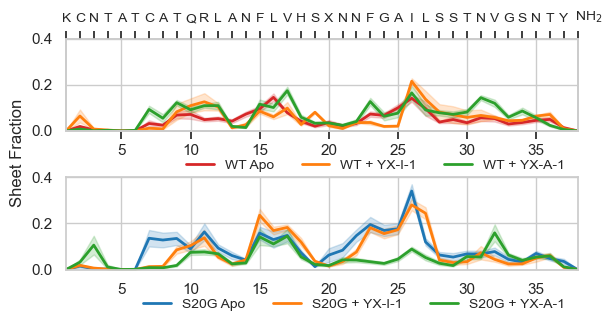

In [125]:
# Helical Fraction of each system 
# both WT and S20G serries 
sns.set(style='whitegrid')

file = 'Eprop.err.dat'
boundfile = 'Eprop.bound.err.dat'

all_dirs = [WT_apo_dir, WT_I_outdir, WT_A_outdir]

labels = [
    "WT Apo",
    "WT + YX-I-1", 
    "WT + YX-A-1"
    
]

new_labels = [
    "WT Apo",
    "WT + YX-I-1",
    "WT + YX-A-1"
    
]

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(6.6,3.0))
for k, ax in enumerate(axs.flatten()): 
    if k > 0: 
        all_dirs = [S20G_apo_dir, S20G_I_outdir, S20G_A_outdir]
        labels=["S20G Apo", "S20G + YX-I-1", "S20G + YX-A-1"]
        new_labels = ["S20G Apo", "S20G + YX-I-1", "S20G + YX-A-1"]
    count = 0 
    for directory in all_dirs: 
        attr = np.loadtxt(directory+file) # attr = attribute 
        upper = attr[:,1] + attr[:,2]
        lower = attr[:,1] - attr[:,2]
        label = labels[count]
        sns.lineplot(x=attr[:, 0], y=attr[:, 1], color=sys_colors[label], label=new_labels[count], linewidth=2, ax=ax)
        ax.fill_between(attr[:, 0], upper, lower, color=sys_colors[label], alpha=0.2)
        count += 1



    ax.set_ylim(0.0, 0.4)
    ax.set_xlim(1, 38)
    # ax.set_xticks(fontsize=12)
    # ax.set_yticks(fontsize=12)
    #plt.xlabel('Residue', fontsize=22, labelpad=30)
    if k < 1: 
        axs[0].grid(True)
        ax2 = axs[0].twiny()
        top_ticks = np.arange(0, 38, 1)

        ax2.set_xticks(top_ticks)
        ax2.set_xticklabels([f'{i}' for i in sequence_ol_both[::1]], fontsize=10)
        ax2.grid(False)
fig.text(0.04, 0.5, 'Sheet Fraction', va='center', rotation='vertical')       
axs[0].legend(loc='upper right', fontsize=10, bbox_to_anchor=(1.0, -0.17), ncol=3, frameon=False)
axs[1].legend(loc='upper right', fontsize=10, bbox_to_anchor=(1.0, -0.17), ncol=3, frameon=False)
plt.subplots_adjust(wspace=0.1, hspace=0.5)

plt.savefig(outdir+'Eprop.wt.s20g.apo.yxi1.yxa1.fig.pdf', dpi=400, bbox_inches='tight')

plt.show()

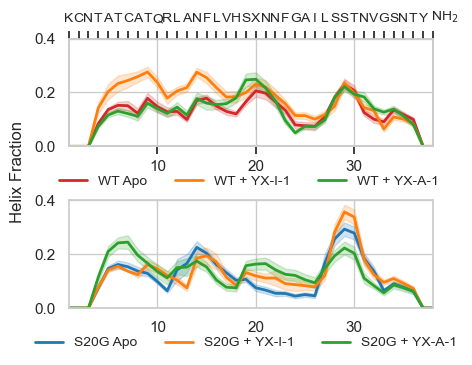

In [126]:
# Helical Fraction of each system 
# both WT and S20G serries 
sns.set(style='whitegrid')

file = 'Hprop.err.dat'
boundfile = 'Hprop.bound.err.dat'

all_dirs = [WT_apo_dir, WT_I_outdir, WT_A_outdir]

labels = [
    "WT Apo",
    "WT + YX-I-1", 
    "WT + YX-A-1"
    
]

new_labels = [
    "WT Apo",
    "WT + YX-I-1",
    "WT + YX-A-1"
    
]

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(4.7,3.5))
for k, ax in enumerate(axs.flatten()): 
    if k > 0: 
        all_dirs = [S20G_apo_dir, S20G_I_outdir, S20G_A_outdir]
        labels=["S20G Apo", "S20G + YX-I-1", "S20G + YX-A-1"]
        new_labels = ["S20G Apo", "S20G + YX-I-1", "S20G + YX-A-1"]
    count = 0 
    for directory in all_dirs: 
        attr = np.loadtxt(directory+file) # attr = attribute 
        upper = attr[:,1] + attr[:,2]
        lower = attr[:,1] - attr[:,2]
        label = labels[count]
        sns.lineplot(x=attr[:, 0], y=attr[:, 1],
                    color=sys_colors[label], label=new_labels[count], linewidth=2, ax=ax)
        ax.fill_between(attr[:, 0], upper, lower, color=sys_colors[label], alpha=0.2)
        count += 1



    ax.set_ylim(0.0, 0.4)
    ax.set_xlim(1, 38)
    # ax.set_xticks(fontsize=12)
    # ax.set_yticks(fontsize=12)
    #plt.xlabel('Residue', fontsize=22, labelpad=30)
    if k < 1: 
        axs[0].grid(True)
        ax2 = axs[0].twiny()
        top_ticks = np.arange(0, 38, 1)

        ax2.set_xticks(top_ticks)
        ax2.set_xticklabels([f'{i}' for i in sequence_ol_both[::1]], fontsize=10)
        ax2.grid(False)
fig.text(0.0, 0.5, 'Helix Fraction', va='center', rotation='vertical')       
axs[0].legend(loc='upper right', fontsize=10, bbox_to_anchor=(1.05, -0.15), ncol=3, frameon=False)
axs[1].legend(loc='upper right', fontsize=10, bbox_to_anchor=(1.10, -0.15), ncol=3, frameon=False)
plt.subplots_adjust(wspace=0.1, hspace=0.5)

plt.savefig(outdir+'Hprop.wt.s20g.apo.yxi1.yxa1.fig3a.pdf', dpi=400, bbox_inches='tight')

plt.show()

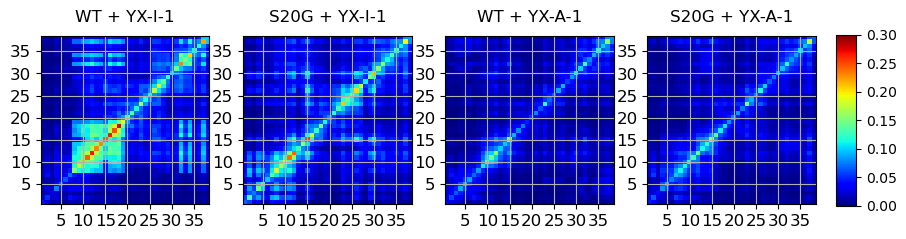

In [127]:
from mpl_toolkits.axes_grid1 import make_axes_locatable 
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
sns.reset_defaults()

# plot all  
fig, axs = plt.subplots(1,4, figsize=(10, 3))

file = "dual_contact_map.dat"
all_dirs = [WT_I_outdir, S20G_I_outdir, WT_A_outdir, S20G_A_outdir]
labels = [
    "WT + YX-I-1",
    "S20G + YX-I-1",
    "WT + YX-A-1",
    "S20G + YX-A-1"
]

count = 0 
for directory in all_dirs: 
    attr = np.loadtxt(directory+file) # attr = attribute 
    label = labels[count]
    #_map = make_c_map(trj)
    im = axs[count].imshow(attr, vmax=0.3, vmin=0.0, cmap = "jet")
    axs[count].set_title(label,size=12,pad=10)
    imaxes = plt.gca()
    count += 1


# Add the colorbar below the subplots
cax = fig.add_axes([0.92, 0.21, .02, 0.57])  # [left, bottom, width, height]
fig.colorbar(im, cax=cax, orientation='vertical')
cax.tick_params(axis="x", labelsize=12)

# divider = make_axes_locatable(axs[3])
# cax = divider.append_axes("right", size="5%", pad=0.05)
# cbar = plt.colorbar(im, cax=cax)
# cbar.set_label("Contact Probability",fontsize=12)

# Set a centered x-label for the figure
#fig.text(0.5, -0.08, 'Residue', ha='center', va='center', fontsize=22)

# Set y-axis tick size
for n, ax in enumerate(axs):
    # offset by 1 for the numbering 
    ax.set_xticks(np.arange(0, 38, 5)-1, np.arange(0,38,5) )
    ax.set_yticks(np.arange(0, 38, 5)-1, np.arange(0,38,5) )
    ax.set_xlim(-0.5,37.5)
    ax.set_ylim(-0.5,37.5)
    # ax.ylabel("Residue")
    # ax.xlabel("Residue")

# Set x-axis tick size
for ax in axs:
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(True)
plt.savefig('%s/dual_contacts.compare.s20g.wt.yxi1.yxa1.pdf' % outdir, dpi=400,bbox_inches='tight')
plt.show()


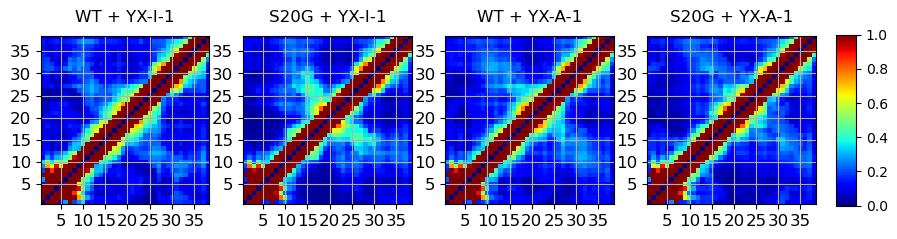

In [128]:
from mpl_toolkits.axes_grid1 import make_axes_locatable 
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
sns.reset_defaults()

# plot all  
fig, axs = plt.subplots(1,4, figsize=(10, 3))

file = "contactmap.dat"
all_dirs = [WT_I_outdir, S20G_I_outdir, WT_A_outdir, S20G_A_outdir]
labels = [
    "WT + YX-I-1",
    "S20G + YX-I-1",
    "WT + YX-A-1",
    "S20G + YX-A-1"
]

count = 0 
for directory in all_dirs: 
    attr = np.loadtxt(directory+file) # attr = attribute 
    label = labels[count]
    #_map = make_c_map(trj)
    im = axs[count].imshow(attr, vmax=1.0, vmin=0.0, cmap = "jet")
    axs[count].set_title(label,size=12,pad=10)
    imaxes = plt.gca()
    count += 1


# Add the colorbar below the subplots
cax = fig.add_axes([0.92, 0.21, .02, 0.57])  # [left, bottom, width, height]
fig.colorbar(im, cax=cax, orientation='vertical')
cax.tick_params(axis="x", labelsize=12)

# divider = make_axes_locatable(axs[3])
# cax = divider.append_axes("right", size="5%", pad=0.05)
# cbar = plt.colorbar(im, cax=cax)
# cbar.set_label("Contact Probability",fontsize=12)

# Set a centered x-label for the figure
#fig.text(0.5, -0.08, 'Residue', ha='center', va='center', fontsize=22)

# Set y-axis tick size
for n, ax in enumerate(axs):
    # offset by 1 for the numbering 
    ax.set_xticks(np.arange(0, 38, 5)-1, np.arange(0,38,5) )
    ax.set_yticks(np.arange(0, 38, 5)-1, np.arange(0,38,5) )
    ax.set_xlim(-0.5,37.5)
    ax.set_ylim(-0.5,37.5)
    # ax.ylabel("Residue")
    # ax.xlabel("Residue")

# Set x-axis tick size
for ax in axs:
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(True)
plt.savefig('%s/protein_contacts.compare.s20g.wt.yxi1.yxa1.pdf' % outdir, dpi=400,bbox_inches='tight')
plt.show()


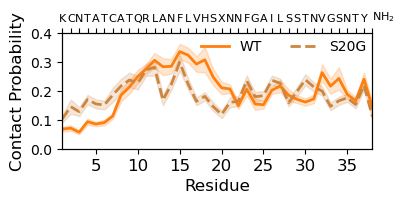

In [129]:
# compare contacts 
file = 'contact.be.pyblock.dat'

labels = ["WT",
    "S20G",
]

colors = ["tab:orange", "peru"]

fig, ax = plt.subplots(figsize=(4.0,1.5))
all_dirs = [WT_I_outdir, S20G_I_outdir]

count = 0 
for directory in all_dirs: 
    attr = np.loadtxt(directory+file) # attr = attribute 
    upper = attr[:,1] + attr[:,2]
    lower = attr[:,1] - attr[:,2]
    linest = "-"
    label = labels[count]
    if label[0] == "S": 
        linest="--"
    sns.lineplot(x=attr[:, 0], y=attr[:, 1],
                color=colors[count], label=label, linewidth=2, linestyle=linest)
    plt.fill_between(attr[:, 0], upper, lower, color=colors[count], alpha=0.2)
    #plt.errorbar(attr[:, 0], attr[:, 1], attr[:,2], color=colors[label], alpha=0.5, linestyle="none")
    count += 1

# set sequence on top and xticks on bottom
bottom_ticks = np.arange(0, 38, 5)
top_ticks = np.arange(0, 38, 1)
ax.set_xticks(bottom_ticks)
ax.set_xticklabels([f'{i}' for i in np.arange(0,38,5)], fontsize=12)
ax.set_ylim(0.0, 0.4)
ax.set_xlim(1, 38)

ax2 = ax.twiny()
ax2.set_xticks(top_ticks)
ax2.set_xticklabels([f'{i}' for i in sequence_ol_both[::1]], fontsize=8)

ax.set_xlabel('Residue', fontsize=12)
ax.set_ylabel('Contact Probability', fontsize=12)
#ax.legend(loc='upper center', fontsize=8, ncol = 2, )#bbox_to_anchor=(0.9, -0.28), frameon=False)
# Specify which major gridlines to show on both axes
ax.set_xticks([5, 10, 15, 20, 25, 30, 35], minor=False)
ax2.grid(False)

# Hide the legend
ax.legend(fontsize=10, frameon=False, loc="upper right", ncols=2, bbox_to_anchor=(1.02, 1.05)) # bbox_to_anchor=(0.35, 0.2))
plt.yticks(fontsize=12)

plt.savefig('%s/wt.s20g.yxi1.contact.pdf' % outdir, dpi=300, bbox_inches="tight")
plt.show()

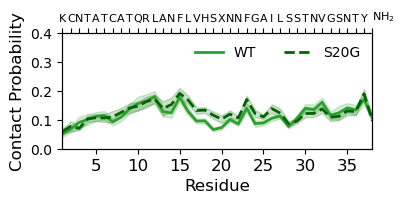

In [130]:
# compare contacts 
file = 'contact.be.pyblock.dat'

labels = ["WT",
    "S20G",
]

colors = ["tab:green", "darkgreen"]

fig, ax = plt.subplots(figsize=(4.0,1.5))
all_dirs = [WT_A_outdir, S20G_A_outdir]

count = 0 
for directory in all_dirs: 
    attr = np.loadtxt(directory+file) # attr = attribute 
    upper = attr[:,1] + attr[:,2]
    lower = attr[:,1] - attr[:,2]
    linest = "-"
    label = labels[count]
    if label[0] == "S": 
        linest="--"
    sns.lineplot(x=attr[:, 0], y=attr[:, 1],
                color=colors[count], label=label, linewidth=2, linestyle=linest)
    plt.fill_between(attr[:, 0], upper, lower, color=colors[count], alpha=0.2)
    #plt.errorbar(attr[:, 0], attr[:, 1], attr[:,2], color=colors[label], alpha=0.5, linestyle="none")
    count += 1

# set sequence on top and xticks on bottom
bottom_ticks = np.arange(0, 38, 5)
top_ticks = np.arange(0, 38, 1)
ax.set_xticks(bottom_ticks)
ax.set_xticklabels([f'{i}' for i in np.arange(0,38,5)], fontsize=12)
ax.set_ylim(0.0, 0.4)
ax.set_xlim(1, 38)

ax2 = ax.twiny()
ax2.set_xticks(top_ticks)
ax2.set_xticklabels([f'{i}' for i in sequence_ol_both[::1]], fontsize=8)

ax.set_xlabel('Residue', fontsize=12)
ax.set_ylabel('Contact Probability', fontsize=12)
#ax.legend(loc='upper center', fontsize=8, ncol = 2, )#bbox_to_anchor=(0.9, -0.28), frameon=False)
# Specify which major gridlines to show on both axes
ax.set_xticks([5, 10, 15, 20, 25, 30, 35], minor=False)
ax2.grid(False)

# Hide the legend
ax.legend(fontsize=10, frameon=False, loc="upper right", ncol=2)
plt.yticks(fontsize=12)

plt.savefig('%s/wt.s20g.yxa1.contact.pdf' % outdir, dpi=300, bbox_inches="tight")
plt.show()

# Figure 4

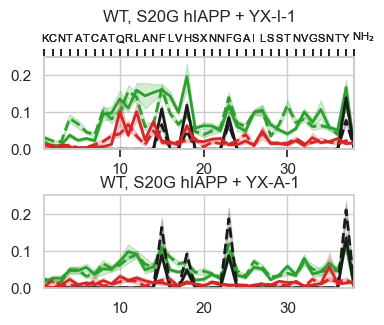

In [154]:
# bound fraction 
files = ["hphob_contacts.BF.dat", "aromatic_stacking.boundfraction.be.dat", "hbond_fraction.boundfraction.be.dat"]
lcolor = ['tab:green', "k", "tab:red"]

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(4.,3.))
for l, file in enumerate(files): 
    for k, ax in enumerate(axs.flatten()): 
        lstyle = "-"
        
        if k > 0: 
            all_dirs = [WT_A_outdir, S20G_A_outdir]
            labels=["WT + YX-A-1", "S20G + YX-A-1"]
            new_labels = ["WT + YX-A-1", "S20G + YX-A-1"]
        else: 
            all_dirs = [ WT_I_outdir, S20G_I_outdir]
            labels = [
                "WT + YX-I-1", 
                "S20G + YX-I-1"
            ]
            new_labels = [
                "WT + YX-I-1",
                "S20G + YX-I-1"
            ]
        
        count = 0 
        for directory in all_dirs: 
            if count > 0: 
                lstyle="--"
            attr = np.loadtxt(directory+file) 
            upper = attr[:,1] + attr[:,2]
            lower = attr[:,1] - attr[:,2]
            sns.lineplot(x=attr[:, 0], y=attr[:, 1],
                        color= lcolor[l], linewidth=2, ax=ax, linestyle=lstyle)
            ax.fill_between(attr[:, 0], upper, lower, color=lcolor[l], alpha=0.2)
            count += 1

        ax.set_ylim(0.0, 0.25)
        ax.set_xlim(1, 38)
        # ax.set_xticks(fontsize=12)
        # ax.set_yticks(fontsize=12)
        #plt.xlabel('Residue', fontsize=22, labelpad=30)
        if k < 1: 
            axs[0].grid(True)
            ax2 = axs[0].twiny()
            top_ticks = np.arange(0, 38, 1)

            ax2.set_xticks(top_ticks)
            ax2.set_xticklabels([f'{i}' for i in sequence_ol_both[::1]], fontsize=8)
            ax2.grid(False)
# axs[0].grid(False)
# fig.text(0.0, 0.5, ' Interaction Type Probability', va='center', rotation='vertical')       
# axs[0].legend(loc='upper right', fontsize=10, bbox_to_anchor=(1.05, -0.15), ncol=3, frameon=False)
# axs[1].legend(loc='upper right', fontsize=10, bbox_to_anchor=(1.10, -0.15), ncol=3, frameon=False)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
axs[0].set_title("WT, S20G hIAPP + YX-I-1", fontsize=12)
axs[1].set_title("WT, S20G hIAPP + YX-A-1", fontsize=12)
plt.savefig(outdir+'interaction.type.probability.wt.s20g.yxi1.yxa1.by.lig.paper.fig.pdf', dpi=400, bbox_inches='tight')

plt.show()

## Supplementary Computations on SPARTA+ Computed chemical shifts. Keep in mind that these chemical shifts are at a different concentration than those taken from NMR 

In [132]:
import pandas as pd
sys.path.append(os.path.abspath("./wt_hiapp_apo/wt_hiapp_reweight/"))
from reweight_functions import read_cs_md

df_wt = pd.read_excel("./scripts/iapp_NMR_CSPs.xlsx", sheet_name="wt_hIAPP").rename(columns={'Unnamed: 0': 'residue'})
df_s20g = pd.read_excel("./scripts/iapp_NMR_CSPs.xlsx", sheet_name="S20G").rename(columns={'Unnamed: 0': 'residue'})

In [133]:
wt_apo_shifts = read_cs_md("./wt_hiapp_apo/wt_hiapp_apo.csv")
# s20g_apo_shifts = read_cs_md("./s20g_hiapp_apo/s20g_hiapp_apo.csv")

In [134]:
df_wt.head()

,residue,Inhibitor,Accelerator
0,4,0.070503,0.012207
1,5,0.015461,0.005532
2,6,0.010024,0.006473
3,7,0.016646,0.009979
4,8,0.027693,0.010545


In [135]:
# average shifts per sequence 
print("WT hIAPP + YX-I-1: ", np.round(np.average(df_wt["Inhibitor"].to_numpy()[1:]), 3), "STD:", np.round(np.std(df_wt["Inhibitor"].to_numpy()[1:]), 3))
print("WT hIAPP + YX-A-1: ", np.round(np.average(df_wt["Accelerator"].to_numpy()), 3), "STD:", np.round(np.std(df_wt["Accelerator"].to_numpy()), 3))
print("S20G hIAPP + YX-I-1: ", np.round(np.average(df_s20g["Inhibitor"].to_numpy()), 3), "STD:", np.round(np.std(df_s20g["Inhibitor"].to_numpy()), 3))
print("S20G hIAPP + YX-A-1: ", np.round(np.average(df_s20g["Accelerator"].to_numpy()), 3), "STD:", np.round(np.std(df_s20g["Accelerator"].to_numpy()), 3))

WT hIAPP + YX-I-1:  0.029 STD: 0.012
WT hIAPP + YX-A-1:  0.009 STD: 0.008
S20G hIAPP + YX-I-1:  0.015 STD: 0.011
S20G hIAPP + YX-A-1:  0.012 STD: 0.009


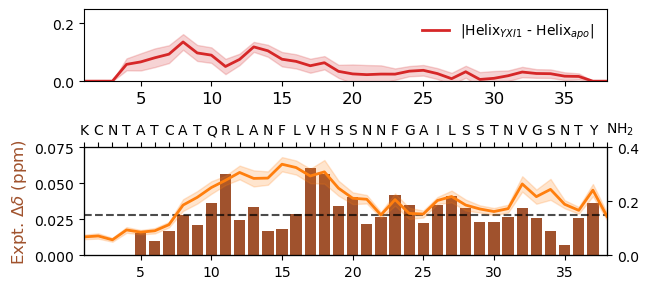

In [136]:
# Define the file paths and labels
file_contact = 'contact.be.pyblock.dat'
file_h_prop = 'Hprop.err.dat'

labels = [
    "WT + YX-I-1",
]

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6.5, 3.0), gridspec_kw={'height_ratios': [1, 1.5]})

# Plot the data from H.prop.dat in the first subplot (ax1)
all_dirs = [WT_I_outdir]
h_dirs = [WT_apo_dir, WT_I_outdir]
h_labels = ["WT Apo", "WT + YX-I-1"]

diff = np.abs(np.loadtxt(h_dirs[1] + file_h_prop)[:,1] - np.loadtxt(h_dirs[0] + file_h_prop)[:,1])
err = np.sqrt(np.loadtxt(h_dirs[1] + file_h_prop)[:,2]**2 + np.loadtxt(h_dirs[0] + file_h_prop)[:,2]**2)
label =  "|Helix$_{YXI1}$ - Helix$_{apo}$|"
sns.lineplot(ax=ax1, x=np.loadtxt(h_dirs[1] + file_h_prop)[:,0], y=diff, color="tab:red", label=label, linewidth=2, zorder=0)
ax1.fill_between(np.loadtxt(h_dirs[1] + file_h_prop)[:,0], diff+ err, diff- err, color="tab:red", alpha=0.2, zorder=1)
# ax1.set_ylabel('$\Delta$ Helix Fraction', fontsize=12)
ax1.legend(loc='upper right', frameon=False)
# ax1.set_xticks([])  # Hide x-ticks for the first subplot
ax1.set_xlim(1,38)
ax1.set_xticks([5, 10, 15, 20, 25, 30, 35], minor=False)
ax1.set_xticklabels([5, 10, 15, 20, 25, 30, 35], fontsize=12)
ax1.set_ylim(0.0,0.25)

ax2.bar(df_wt["residue"].to_numpy()[1:], df_wt["Inhibitor"].to_numpy()[1:], color="sienna", zorder=0)
ax2.set_ylabel('Expt. $\Delta \delta$ (ppm)', fontsize=12, color="sienna")
ax2.set_ylim(bottom=0.0, top=0.075)
ax2.hlines(2 * np.std(df_wt["Inhibitor"].to_numpy()), 1, 38, linestyle="--", color="black", alpha=0.7, zorder=1)

# Plot hbar on the second subplot (ax2)
ax3 = ax2.twinx()

# Plot the contact data in the second subplot (ax2)
count = 0
for directory in all_dirs: 
    attr = np.loadtxt(directory + file_contact)  # attr = attribute 
    upper = attr[:, 1] + attr[:, 2]
    lower = attr[:, 1] - attr[:, 2]

    label = labels[count]
    linest = "-"
    sns.lineplot(ax=ax3, x=attr[:, 0], y=attr[:, 1], color=sys_colors[label], label=label, linewidth=2, 
                 linestyle=linest, zorder=2)
    ax3.fill_between(attr[:, 0], upper, lower, color=sys_colors[label], alpha=0.2, zorder=3)
    count += 1

# Set x-ticks and labels for the second subplot (ax2)
bottom_ticks = np.arange(0, 38, 5)
top_ticks = np.arange(0, 38, 1)
ax3.set_xticks(bottom_ticks)
ax3.set_xticklabels([f'{i}' for i in np.arange(0, 38, 5)], fontsize=12)
ax3.set_ylim(0.0, 0.4)
ax3.set_xlim(1, 38)

ax4 = ax3.twiny()
ax4.set_xticks(top_ticks)
ax4.set_xticklabels([f'{i}' for i in sequence_ol_wt[::1]], fontsize=10)

# ax2.set_xlabel('Residue', fontsize=12)
# ax2.set_ylabel('Contact Probability', fontsize=12)
ax2.set_xticks([5, 10, 15, 20, 25, 30, 35], minor=False)
ax4.grid(False)
ax3.legend().set_visible(False)
# ax2.yticks(fontsize=12)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('%s/wt.yxi1.contact.csshifts.dHelix.pdf' % outdir, dpi=300, bbox_inches="tight")
plt.show()

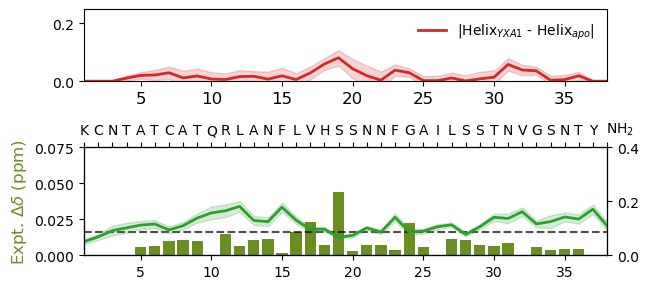

In [137]:
# Define the file paths and labels
file_contact = 'contact.be.pyblock.dat'
file_h_prop = 'Hprop.err.dat'

labels = [
    "WT + YX-A-1",
]

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6.5, 3.0), gridspec_kw={'height_ratios': [1, 1.5]})

# Plot the data from H.prop.dat in the first subplot (ax1)
all_dirs = [WT_A_outdir]
h_dirs = [WT_apo_dir, WT_A_outdir]
h_labels = ["WT Apo", "WT + YX-A-1"]

diff = np.abs(np.loadtxt(h_dirs[1] + file_h_prop)[:,1] - np.loadtxt(h_dirs[0] + file_h_prop)[:,1])
err = np.sqrt(np.loadtxt(h_dirs[1] + file_h_prop)[:,2]**2 + np.loadtxt(h_dirs[0] + file_h_prop)[:,2]**2)
label =  "|Helix$_{YXA1}$ - Helix$_{apo}$|"
sns.lineplot(ax=ax1, x=np.loadtxt(h_dirs[1] + file_h_prop)[:,0], y=diff, color="tab:red", label=label, linewidth=2, zorder=0)
ax1.fill_between(np.loadtxt(h_dirs[1] + file_h_prop)[:,0], diff+ err, diff- err, color="tab:red", alpha=0.2, zorder=1)
# ax1.set_ylabel('$\Delta$ Helix Fraction', fontsize=12)
ax1.legend(loc='upper right', frameon=False)
# ax1.set_xticks([])  # Hide x-ticks for the first subplot
ax1.set_xlim(1,38)
ax1.set_xticks([5, 10, 15, 20, 25, 30, 35], minor=False)
ax1.set_xticklabels([5, 10, 15, 20, 25, 30, 35], fontsize=12)
ax1.set_ylim(0.0,0.25)

ax2.bar(df_wt["residue"].to_numpy()[1:], df_wt["Accelerator"].to_numpy()[1:], color="olivedrab", zorder=0)
ax2.set_ylabel('Expt. $\Delta \delta$ (ppm)', fontsize=12, color="olivedrab")
ax2.set_ylim(bottom=0.0, top=0.075)
ax2.hlines(2 * np.std(df_wt["Accelerator"].to_numpy()), 1, 38, linestyle="--", color="black", alpha=0.7, zorder=1)

# Plot hbar on the second subplot (ax2)
ax3 = ax2.twinx()

# Plot the contact data in the second subplot (ax2)
count = 0
for directory in all_dirs: 
    attr = np.loadtxt(directory + file_contact)  # attr = attribute 
    upper = attr[:, 1] + attr[:, 2]
    lower = attr[:, 1] - attr[:, 2]

    label = labels[count]
    linest = "-"
    sns.lineplot(ax=ax3, x=attr[:, 0], y=attr[:, 1], color=sys_colors[label], label=label, linewidth=2, 
                 linestyle=linest, zorder=2)
    ax3.fill_between(attr[:, 0], upper, lower, color=sys_colors[label], alpha=0.2, zorder=3)
    count += 1

# Set x-ticks and labels for the second subplot (ax2)
bottom_ticks = np.arange(0, 38, 5)
top_ticks = np.arange(0, 38, 1)
ax3.set_xticks(bottom_ticks)
ax3.set_xticklabels([f'{i}' for i in np.arange(0, 38, 5)], fontsize=12)
ax3.set_ylim(0.0, 0.4)
ax3.set_xlim(1, 38)

ax4 = ax3.twiny()
ax4.set_xticks(top_ticks)
ax4.set_xticklabels([f'{i}' for i in sequence_ol_wt[::1]], fontsize=10)

# ax2.set_xlabel('Residue', fontsize=12)
# ax2.set_ylabel('Contact Probability', fontsize=12)
ax2.set_xticks([5, 10, 15, 20, 25, 30, 35], minor=False)
ax4.grid(False)
ax3.legend().set_visible(False)
# ax2.yticks(fontsize=12)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('%s/wt.yxa1.contact.csshifts.dHelix.pdf' % outdir, dpi=300, bbox_inches="tight")
plt.show()

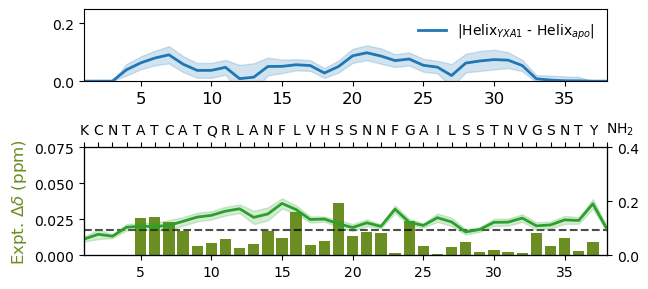

In [138]:
# Define the file paths and labels
file_contact = 'contact.be.pyblock.dat'
file_h_prop = 'Hprop.err.dat'

labels = [
    "S20G + YX-A-1",
]

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6.5, 3.0), gridspec_kw={'height_ratios': [1, 1.5]})

# Plot the data from H.prop.dat in the first subplot (ax1)
all_dirs = [S20G_A_outdir]
h_dirs = [S20G_apo_dir, S20G_A_outdir]
h_labels = ["S20G Apo", "S20G + YX-A-1"]

diff = np.abs(np.loadtxt(h_dirs[1] + file_h_prop)[:,1] - np.loadtxt(h_dirs[0] + file_h_prop)[:,1])
err = np.sqrt(np.loadtxt(h_dirs[1] + file_h_prop)[:,2]**2 + np.loadtxt(h_dirs[0] + file_h_prop)[:,2]**2)
label =  "|Helix$_{YXA1}$ - Helix$_{apo}$|"
sns.lineplot(ax=ax1, x=np.loadtxt(h_dirs[1] + file_h_prop)[:,0], y=diff, color="tab:blue", label=label, linewidth=2, zorder=0)
ax1.fill_between(np.loadtxt(h_dirs[1] + file_h_prop)[:,0], diff+ err, diff- err, color="tab:blue", alpha=0.2, zorder=1)
# ax1.set_ylabel('$\Delta$ Helix Fraction', fontsize=12)
ax1.legend(loc='upper right', frameon=False)
# ax1.set_xticks([])  # Hide x-ticks for the first subplot
ax1.set_xlim(1,38)
ax1.set_xticks([5, 10, 15, 20, 25, 30, 35], minor=False)
ax1.set_xticklabels([5, 10, 15, 20, 25, 30, 35], fontsize=12)
ax1.set_ylim(0.0,0.25)

ax2.bar(df_s20g["residue"].to_numpy()[1:], df_s20g["Accelerator"].to_numpy()[1:], color="olivedrab", zorder=0)
ax2.set_ylabel('Expt. $\Delta \delta$ (ppm)', fontsize=12, color="olivedrab")
ax2.set_ylim(bottom=0.0, top=0.075)
ax2.hlines(2 * np.std(df_s20g["Accelerator"].to_numpy()), 1, 38, linestyle="--", color="black", alpha=0.7, zorder=1)

# Plot hbar on the second subplot (ax2)
ax3 = ax2.twinx()

# Plot the contact data in the second subplot (ax2)
count = 0
for directory in all_dirs: 
    attr = np.loadtxt(directory + file_contact)  # attr = attribute 
    upper = attr[:, 1] + attr[:, 2]
    lower = attr[:, 1] - attr[:, 2]

    label = labels[count]
    linest = "-"
    sns.lineplot(ax=ax3, x=attr[:, 0], y=attr[:, 1], color=sys_colors[label], label=label, linewidth=2, 
                 linestyle=linest, zorder=2)
    ax3.fill_between(attr[:, 0], upper, lower, color=sys_colors[label], alpha=0.2, zorder=3)
    count += 1

# Set x-ticks and labels for the second subplot (ax2)
bottom_ticks = np.arange(0, 38, 5)
top_ticks = np.arange(0, 38, 1)
ax3.set_xticks(bottom_ticks)
ax3.set_xticklabels([f'{i}' for i in np.arange(0, 38, 5)], fontsize=12)
ax3.set_ylim(0.0, 0.4)
ax3.set_xlim(1, 38)

ax4 = ax3.twiny()
ax4.set_xticks(top_ticks)
ax4.set_xticklabels([f'{i}' for i in sequence_ol_wt[::1]], fontsize=10)

# ax2.set_xlabel('Residue', fontsize=12)
# ax2.set_ylabel('Contact Probability', fontsize=12)
ax2.set_xticks([5, 10, 15, 20, 25, 30, 35], minor=False)
ax4.grid(False)
ax3.legend().set_visible(False)
# ax2.yticks(fontsize=12)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('%s/s20g.yxa1.contact.csshifts.dHelix.pdf' % outdir, dpi=300, bbox_inches="tight")
plt.show()

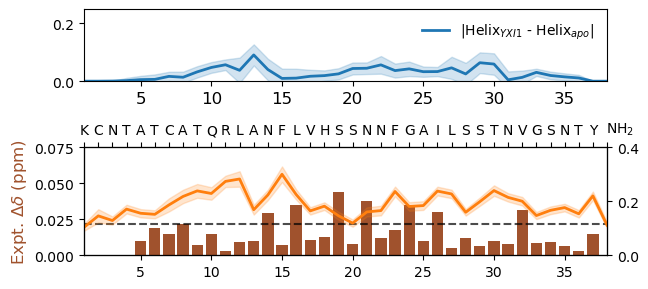

In [139]:
# Define the file paths and labels
file_contact = 'contact.be.pyblock.dat'
file_h_prop = 'Hprop.err.dat'

labels = [
    "S20G + YX-I-1",
]

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6.5, 3), gridspec_kw={'height_ratios': [1, 1.5]})

# Plot the data from H.prop.dat in the first subplot (ax1)
all_dirs = [S20G_I_outdir]
h_dirs = [S20G_apo_dir, S20G_I_outdir]
h_labels = ["S20G Apo", "S20G + YX-I-1"]

diff = np.abs(np.loadtxt(h_dirs[1] + file_h_prop)[:,1] - np.loadtxt(h_dirs[0] + file_h_prop)[:,1])
err = np.sqrt(np.loadtxt(h_dirs[1] + file_h_prop)[:,2]**2 + np.loadtxt(h_dirs[0] + file_h_prop)[:,2]**2)
label =  "|Helix$_{YXI1}$ - Helix$_{apo}$|"
sns.lineplot(ax=ax1, x=np.loadtxt(h_dirs[1] + file_h_prop)[:,0], y=diff, color="tab:blue", label=label, linewidth=2, zorder=0)
ax1.fill_between(np.loadtxt(h_dirs[1] + file_h_prop)[:,0], diff+ err, diff- err, color="tab:blue", alpha=0.2, zorder=1)
# ax1.set_ylabel('$\Delta$ Helix Fraction', fontsize=12)
ax1.legend(loc='upper right', frameon=False)
# ax1.set_xticks([])  # Hide x-ticks for the first subplot
ax1.set_xlim(1,38)
ax1.set_xticks([5, 10, 15, 20, 25, 30, 35], minor=False)
ax1.set_xticklabels([5, 10, 15, 20, 25, 30, 35], fontsize=12)
ax1.set_ylim(0.0,0.25)
ax1.grid(False)

ax2.bar(df_s20g["residue"].to_numpy()[1:], df_s20g["Inhibitor"].to_numpy()[1:], color="sienna", zorder=0)
ax2.set_ylabel('Expt. $\Delta \delta$ (ppm)', fontsize=12, color="sienna")
ax2.set_ylim(bottom=0.0, top=0.075)
ax2.hlines(2 * np.std(df_s20g["Inhibitor"].to_numpy()), 1, 38, linestyle="--", color="black", alpha=0.7, zorder=1)

# Plot hbar on the second subplot (ax2)
ax3 = ax2.twinx()

# Plot the contact data in the second subplot (ax2)
count = 0
for directory in all_dirs: 
    attr = np.loadtxt(directory + file_contact)  # attr = attribute 
    upper = attr[:, 1] + attr[:, 2]
    lower = attr[:, 1] - attr[:, 2]

    label = labels[count]
    linest = "-"
    sns.lineplot(ax=ax3, x=attr[:, 0], y=attr[:, 1], color=sys_colors[label], label=label, linewidth=2, 
                 linestyle=linest, zorder=2)
    ax3.fill_between(attr[:, 0], upper, lower, color=sys_colors[label], alpha=0.2, zorder=3)
    count += 1

# Set x-ticks and labels for the second subplot (ax2)
bottom_ticks = np.arange(0, 38, 5)
top_ticks = np.arange(0, 38, 1)
ax3.set_xticks(bottom_ticks)
ax3.set_xticklabels([f'{i}' for i in np.arange(0, 38, 5)], fontsize=12)
ax3.set_ylim(0.0, 0.4)
ax3.set_xlim(1, 38)

ax4 = ax3.twiny()
ax4.set_xticks(top_ticks)
ax4.set_xticklabels([f'{i}' for i in sequence_ol_wt[::1]], fontsize=10)

# ax2.set_xlabel('Residue', fontsize=12)
# ax2.set_ylabel('Contact Probability', fontsize=12)
ax2.set_xticks([5, 10, 15, 20, 25, 30, 35], minor=False)
ax4.grid(False)
ax3.legend().set_visible(False)
# ax2.yticks(fontsize=12)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('%s/s20g.yxi1.contact.csshifts.dHelix.pdf' % outdir, dpi=300, bbox_inches="tight")
plt.show()

# Supplementary Figures of Combined Systems

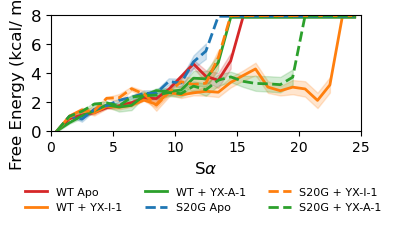

In [140]:
# equilibration of bound fraction 
file = "Sa_dg.dat"


labels = ["WT Apo", "WT + YX-I-1", "WT + YX-A-1", 
          "S20G Apo", "S20G + YX-I-1", "S20G + YX-A-1"]

fig, ax = plt.subplots(figsize=(4.0,1.5))
all_dirs = [WT_apo_dir, WT_I_outdir, WT_A_outdir, S20G_apo_dir, S20G_I_outdir, S20G_A_outdir]

count = 0 
linest="-"
for directory in all_dirs: 
    label = labels[count]
    if label[0] == "S": 
        linest="--"
    attr = np.loadtxt(directory+file) 
    upper = attr[:,1] + attr[:,2]
    lower = attr[:,1] - attr[:,2]
    sns.lineplot(x=attr[:, 0], y=attr[:, 1],
                color= sys_colors[label], linewidth=2, ax=ax, label=label, linestyle=linest)
    ax.fill_between(attr[:, 0], upper, lower, color=sys_colors[label], alpha=0.2)
    count += 1

ax.set_xlabel("S" + r'$\alpha$', fontsize=12)
ax.set_ylabel('Free Energy (kcal/ mol)', fontsize=12)
ax.set_ylim(0, 8)
ax.set_xlim(0,25)
ax.legend(fontsize=8, frameon=False, ncols=3, bbox_to_anchor=(1.10, -0.4))
plt.yticks(fontsize=12)

# plt.savefig('%s/wt.s20g.yxa1.sa.timecourse.pdf' % outdir, dpi=300, bbox_inches="tight")
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

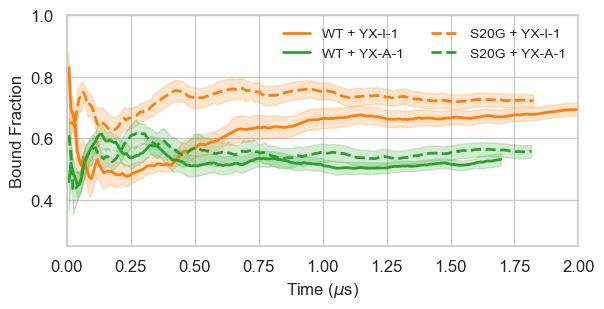

In [151]:
# equilibration of bound fraction 
file = "bf.timecourse.errors.dat"

labels = ["WT + YX-I-1", "WT + YX-A-1", 
          "S20G + YX-I-1", "S20G + YX-A-1"]

fig, ax = plt.subplots(figsize=(6.6,3.0))
all_dirs = [ WT_I_outdir, WT_A_outdir, S20G_I_outdir, S20G_A_outdir]

count = 0 
linest="-"
for directory in all_dirs: 
    label = labels[count]
    if label[0] == "S": 
        linest="--"
    attr = np.loadtxt(directory+file) 
    upper = attr[:,2] 
    lower = attr[:,3]
    sns.lineplot(x=attr[:, 0], y=attr[:, 1],
                color= sys_colors[label], linewidth=2, ax=ax, label=label, linestyle=linest)
    ax.fill_between(attr[:, 0], upper, lower, color=sys_colors[label], alpha=0.2)
    count += 1

ax.set_xlabel("Time ($\mu$s)" , fontsize=12)
ax.set_ylabel('Bound Fraction', fontsize=12)
ax.set_ylim(0.25, 1)
ax.set_xlim(0,2)
ax.legend(fontsize=10, frameon=False, ncols=2,) #  bbox_to_anchor=(0.7, -0.2)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.savefig('%s/wt.s20g.yxa1.yxi1.bf.timecourse.pdf' % outdir, dpi=300, bbox_inches="tight")
plt.show()

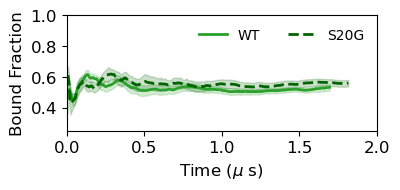

In [142]:
# equilibration of bound fraction 
file = "bf.timecourse.errors.dat"


labels = ["WT",
    "S20G",
]

colors = ["tab:green", "darkgreen"]

fig, ax = plt.subplots(figsize=(4.0,1.5))
all_dirs = [WT_A_outdir, S20G_A_outdir]

count = 0 
for directory in all_dirs: 
    attr = np.loadtxt(directory+file) # attr = attribute 
    upper = attr[:,2] 
    lower = attr[:,3]
    linest = "-"
    label = labels[count]
    if label[0] == "S": 
        linest="--"
    sns.lineplot(x=attr[:, 0], y=attr[:, 1],
                color=colors[count], label=label, linewidth=2, linestyle=linest)
    plt.fill_between(attr[:, 0], upper, lower, color=colors[count], alpha=0.2)
    #plt.errorbar(attr[:, 0], attr[:, 1], attr[:,2], color=colors[label], alpha=0.5, linestyle="none")
    count += 1

ax.set_xlabel("Time ($\mu$ s)" , fontsize=12)
ax.set_ylabel('Bound Fraction', fontsize=12)
ax.set_ylim(0.25, 1)
ax.set_xlim(0,2)
ax.legend(fontsize=10, frameon=False, ncols=2,) #  bbox_to_anchor=(0.7, -0.2)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.savefig('%s/wt.s20g.yxa1.bf.timecourse.pdf' % outdir, dpi=300, bbox_inches="tight")
plt.show()

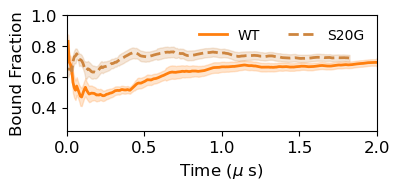

In [143]:
# equilibration of bound fraction 
file = "bf.timecourse.errors.dat"

labels = ["WT",
    "S20G",
]

colors = ["tab:orange", "peru"]

fig, ax = plt.subplots(figsize=(4.0,1.5))
all_dirs = [WT_I_outdir, S20G_I_outdir]

count = 0 
for directory in all_dirs: 
    attr = np.loadtxt(directory+file) # attr = attribute 
    upper = attr[:,2] 
    lower = attr[:,3]
    linest = "-"
    label = labels[count]
    if label[0] == "S": 
        linest="--"
    sns.lineplot(x=attr[:, 0], y=attr[:, 1],
                color=colors[count], label=label, linewidth=2, linestyle=linest)
    plt.fill_between(attr[:, 0], upper, lower, color=colors[count], alpha=0.2)
    #plt.errorbar(attr[:, 0], attr[:, 1], attr[:,2], color=colors[label], alpha=0.5, linestyle="none")
    count += 1

ax.set_xlabel("Time ($\mu$ s)" , fontsize=12)
ax.set_ylabel('Bound Fraction', fontsize=12)
ax.set_ylim(0.25, 1)
ax.set_xlim(0,2)
ax.legend(fontsize=10, frameon=False, ncols=2,) #  bbox_to_anchor=(0.7, -0.2)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.savefig('%s/wt.s20g.yxi1.bf.timecourse.pdf' % outdir, dpi=300, bbox_inches="tight")
plt.show()

<Figure size 640x480 with 0 Axes>

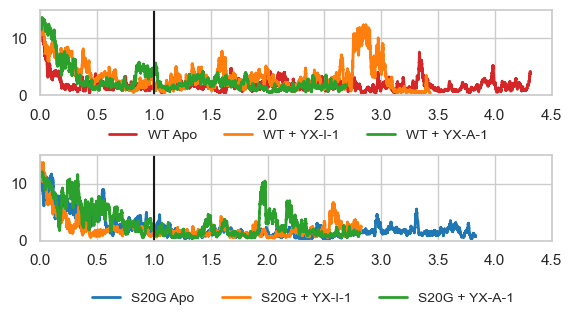

In [150]:
# equilibration of SA together 
file = "Sa_total_untruncated_smooth.dat"

# Helical Fraction of each system 
# both WT and S20G serries 
sns.set(style='whitegrid')

all_dirs = [WT_apo_dir, WT_I_outdir, WT_A_outdir]

labels = [
    "WT Apo",
    "WT + YX-I-1", 
    "WT + YX-A-1"
    
]

new_labels = [
    "WT Apo",
    "WT + YX-I-1",
    "WT + YX-A-1"
    
]

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(6.6,3.0))
for k, ax in enumerate(axs.flatten()): 
    if k > 0: 
        all_dirs = [S20G_apo_dir, S20G_I_outdir, S20G_A_outdir]
        labels=["S20G Apo", "S20G + YX-I-1", "S20G + YX-A-1"]
        new_labels = ["S20G Apo", "S20G + YX-I-1", "S20G + YX-A-1"]
    count = 0 
    for directory in all_dirs: 
        attr = np.loadtxt(directory+file) # attr = attribute 
        label = labels[count]
        sns.lineplot(x = attr[:,0]/1000, y = attr[:,1], color=sys_colors[label], label=new_labels[count], linewidth=2, ax=ax)
        count += 1



    ax.set_ylim(0.0, 15)
    ax.set_xlim(0, 4.5)

# fig.text(0.04, 0.5, 'S$_\\alpha$', va='center', rotation='vertical')       
axs[0].legend(loc='upper right', fontsize=10, bbox_to_anchor=(0.9, -0.25), ncol=3, frameon=False)
axs[1].legend(loc='upper right', fontsize=10, bbox_to_anchor=(0.95, -0.45), ncol=3, frameon=False)
plt.subplots_adjust(wspace=0.1, hspace=0.7)
axs[0].vlines(1, 0, 15, colors="k")
axs[1].vlines(1, 0, 15, colors="k")
plt.savefig(outdir+'sa_untrunc.wt.s20g.apo.yxi1.yxa1.fig.pdf', dpi=400, bbox_inches='tight')

plt.show()
plt.clf()


In [145]:
from matplotlib import colormaps 
viridis = colormaps['viridis'].resampled(7)

<Figure size 640x480 with 0 Axes>

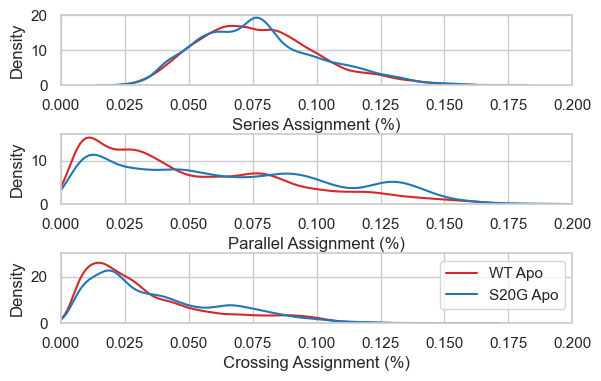

In [146]:
import seaborn as sns 
#  equilibration of bound fraction 
file = "topology_per_frame.npy"

labels = ["WT Apo",
    "S20G Apo"]

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(6.6,4.0))
axs = axs.flatten()
all_dirs = [WT_apo_dir, S20G_apo_dir]

count = 0 
for directory in all_dirs:
    attr = np.load(directory+file)
    ls = "-"
    # if count%2 == 1: 
    #     ls = "--"
    sns.kdeplot(attr[:,0], label= labels[count], c=sys_colors[labels[count]], linestyle=ls, ax = axs[0])
    sns.kdeplot(attr[:,1], label= labels[count], c=sys_colors[labels[count]], linestyle=ls, ax = axs[1])
    sns.kdeplot(attr[:,2], label= labels[count], c=sys_colors[labels[count]], linestyle=ls, ax = axs[2])
    count +=1

plt.xlim(0.0,0.20)
plt.ylim(0, 30)

axs[0].set_xlim((0,0.2))
axs[0].set_ylim((0,20))
axs[0].set_xlabel("Series Assignment (%)")
axs[1].set_xlim((0,0.2))
axs[1].set_xlabel("Parallel Assignment (%)")
axs[2].set_xlim((0,0.2))
axs[2].set_xlabel("Crossing Assignment (%)")

plt.legend()
plt.subplots_adjust(hspace=0.7)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

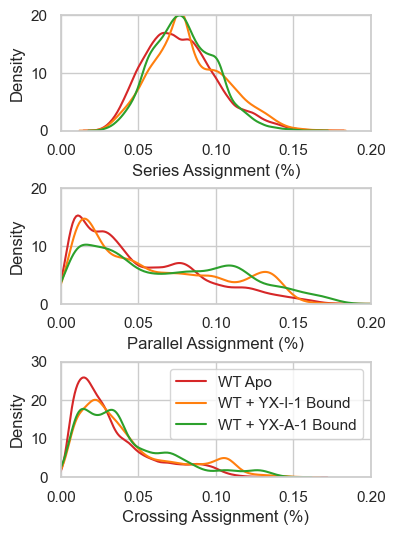

In [147]:
#  equilibration of bound fraction 
file = "topology_per_frame.npy"

labels = ["WT Apo", "WT + YX-I-1", "WT + YX-A-1"]

fig, axs = plt.subplots(nrows=3, figsize=(4.0,6.0))
all_dirs = [WT_apo_dir, WT_I_outdir, WT_A_outdir]

axs = axs.flatten()
count = 0 
for directory in all_dirs:
    ls = "-"
    if count%3 == 1: 
        file = "topology_bound_per_frame.npy"

    color_id = count %6
    attr = np.load(directory+file)
    lbl =  labels[count] if count%3 == 0 else labels[count] + " Bound"
    sns.kdeplot(attr[:,0], label=lbl, c=sys_colors[labels[count]], linestyle=ls, ax=axs[0])
    sns.kdeplot(attr[:,1], label=lbl, c=sys_colors[labels[count]], linestyle=ls, ax=axs[1])
    sns.kdeplot(attr[:,2], label=lbl, c=sys_colors[labels[count]], linestyle=ls, ax=axs[2])

    # sns.kdeplot(attr[:,0], label=lbl, linestyle=ls, ax=axs[0], multiple="stack")
    # sns.kdeplot(attr[:,1], label=lbl, linestyle=ls, ax=axs[1], multiple="stack")
    # sns.kdeplot(attr[:,2], label=lbl, linestyle=ls, ax=axs[2], multiple="stack")
    count +=1

axs[0].set_xlim((0,0.2))
axs[0].set_ylim((0,20))
axs[0].set_xlabel("Series Assignment (%)")
axs[1].set_xlim((0,0.2))
axs[1].set_ylim((0,20))
axs[1].set_xlabel("Parallel Assignment (%)")
axs[2].set_xlim((0,0.2))
axs[2].set_ylim((0,30))
axs[2].set_xlabel("Crossing Assignment (%)")
plt.legend()
plt.subplots_adjust(hspace=0.5)
plt.savefig(outdir + "topology_kde_all_wt.pdf", dpi=300)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

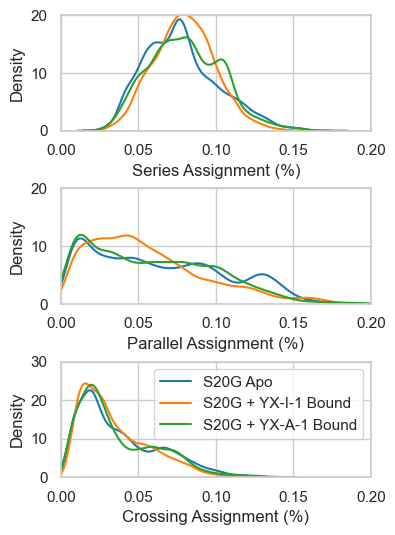

In [148]:
#  equilibration of bound fraction 
file = "topology_per_frame.npy"

labels = ["S20G Apo", "S20G + YX-I-1", "S20G + YX-A-1"]

fig, axs = plt.subplots(nrows=3, figsize=(4.0,6.0))
all_dirs = [S20G_apo_dir, S20G_I_outdir, S20G_A_outdir]

axs = axs.flatten()
count = 0 
for directory in all_dirs:
    ls = "-"
    if count%3 == 1: 
        file = "topology_bound_per_frame.npy"

    color_id = count %6
    attr = np.load(directory+file)
    lbl =  labels[count] if count%3 == 0 else labels[count] + " Bound"
    sns.kdeplot(attr[:,0], label=lbl, c=sys_colors[labels[count]], linestyle=ls, ax=axs[0])
    sns.kdeplot(attr[:,1], label=lbl, c=sys_colors[labels[count]], linestyle=ls, ax=axs[1])
    sns.kdeplot(attr[:,2], label=lbl, c=sys_colors[labels[count]], linestyle=ls, ax=axs[2])

    # sns.kdeplot(attr[:,0], label=lbl, linestyle=ls, ax=axs[0], multiple="stack")
    # sns.kdeplot(attr[:,1], label=lbl, linestyle=ls, ax=axs[1], multiple="stack")
    # sns.kdeplot(attr[:,2], label=lbl, linestyle=ls, ax=axs[2], multiple="stack")
    count +=1

axs[0].set_xlim((0,0.2))
axs[0].set_ylim((0,20))
axs[0].set_xlabel("Series Assignment (%)")
axs[1].set_xlim((0,0.2))
axs[1].set_ylim((0,20))
axs[1].set_xlabel("Parallel Assignment (%)")
axs[2].set_xlim((0,0.2))
axs[2].set_ylim((0,30))
axs[2].set_xlabel("Crossing Assignment (%)")
plt.legend()
plt.subplots_adjust(hspace=0.5)

plt.savefig(outdir + "topology_kde_all_s20g.pdf", dpi=300)
plt.show()
plt.clf()